In [ ]:
from google.colab import files
uploaded=files.upload()

Saving glass.xlsx to glass (2).xlsx


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df1 = pd.read_excel('/content/glass.xlsx')

df1.head(19)


,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [66]:

df = pd.read_excel('/content/glass.xlsx', sheet_name = 1)

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [67]:

print("Shape of the dataset:", df.shape)

Shape of the dataset: (214, 10)


In [68]:

print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [69]:

print("\nSummary statistics of numerical columns:")
print(df.describe().T)


Summary statistics of numerical columns:
      count       mean       std       min        25%       50%        75%  \
RI    214.0   1.518365  0.003037   1.51115   1.516522   1.51768   1.519157   
Na    214.0  13.407850  0.816604  10.73000  12.907500  13.30000  13.825000   
Mg    214.0   2.684533  1.442408   0.00000   2.115000   3.48000   3.600000   
Al    214.0   1.444907  0.499270   0.29000   1.190000   1.36000   1.630000   
Si    214.0  72.650935  0.774546  69.81000  72.280000  72.79000  73.087500   
K     214.0   0.497056  0.652192   0.00000   0.122500   0.55500   0.610000   
Ca    214.0   8.956963  1.423153   5.43000   8.240000   8.60000   9.172500   
Ba    214.0   0.175047  0.497219   0.00000   0.000000   0.00000   0.000000   
Fe    214.0   0.057009  0.097439   0.00000   0.000000   0.00000   0.100000   
Type  214.0   2.780374  2.103739   1.00000   1.000000   2.00000   3.000000   

           max  
RI     1.53393  
Na    17.38000  
Mg     4.49000  
Al     3.50000  
Si    75.41000

In [70]:
# Create a histogram for each numerical column
fig = go.Figure()
for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    fig.add_trace(go.Histogram(x=df[column], name=column))

fig.update_layout(
    title="Distribution of Numerical Data",
    xaxis_title="Values",
    yaxis_title="Frequency"
)

fig.show()

In [71]:

categorical_columns = ['Type']

# Create a bar plot for each categorical column
fig = go.Figure()
for column in categorical_columns:
    counts = df[column].value_counts()
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=column))

fig.update_layout(
    title="Distribution of Categorical Data",
    xaxis_title="Categories",
    yaxis_title="Number of Samples"
)

fig.show()

In [72]:

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [73]:

print("\nDuplicate values:")
print(df.duplicated().sum())


Duplicate values:
1


In [74]:

df.drop_duplicates(inplace=True)

In [76]:
print("\nDuplicate values:")
print(df.duplicated().sum())


Duplicate values:
0


In [77]:

# Create a box plot for each numerical column
fig = go.Figure()
for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    fig.add_trace(go.Box(y=df[column], name=column, boxmean='sd'))

# Update layout
fig.update_layout(
    title="Box Plot of Numerical Data (Check Outliers)",
    yaxis_title="Values"
)

# Show the plot
fig.show()

In [78]:

print("\nCount of each class in the target variable:")
print(df['Type'].value_counts())


Count of each class in the target variable:
Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


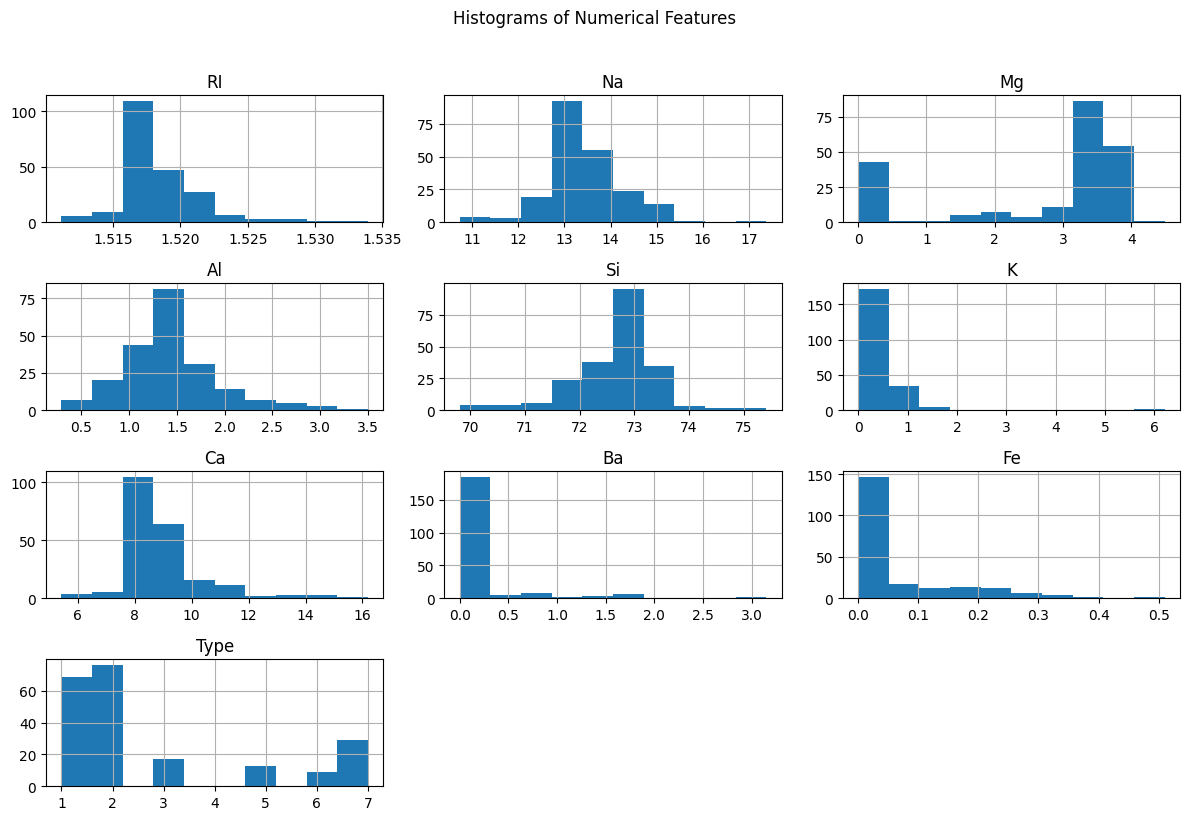

In [79]:
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

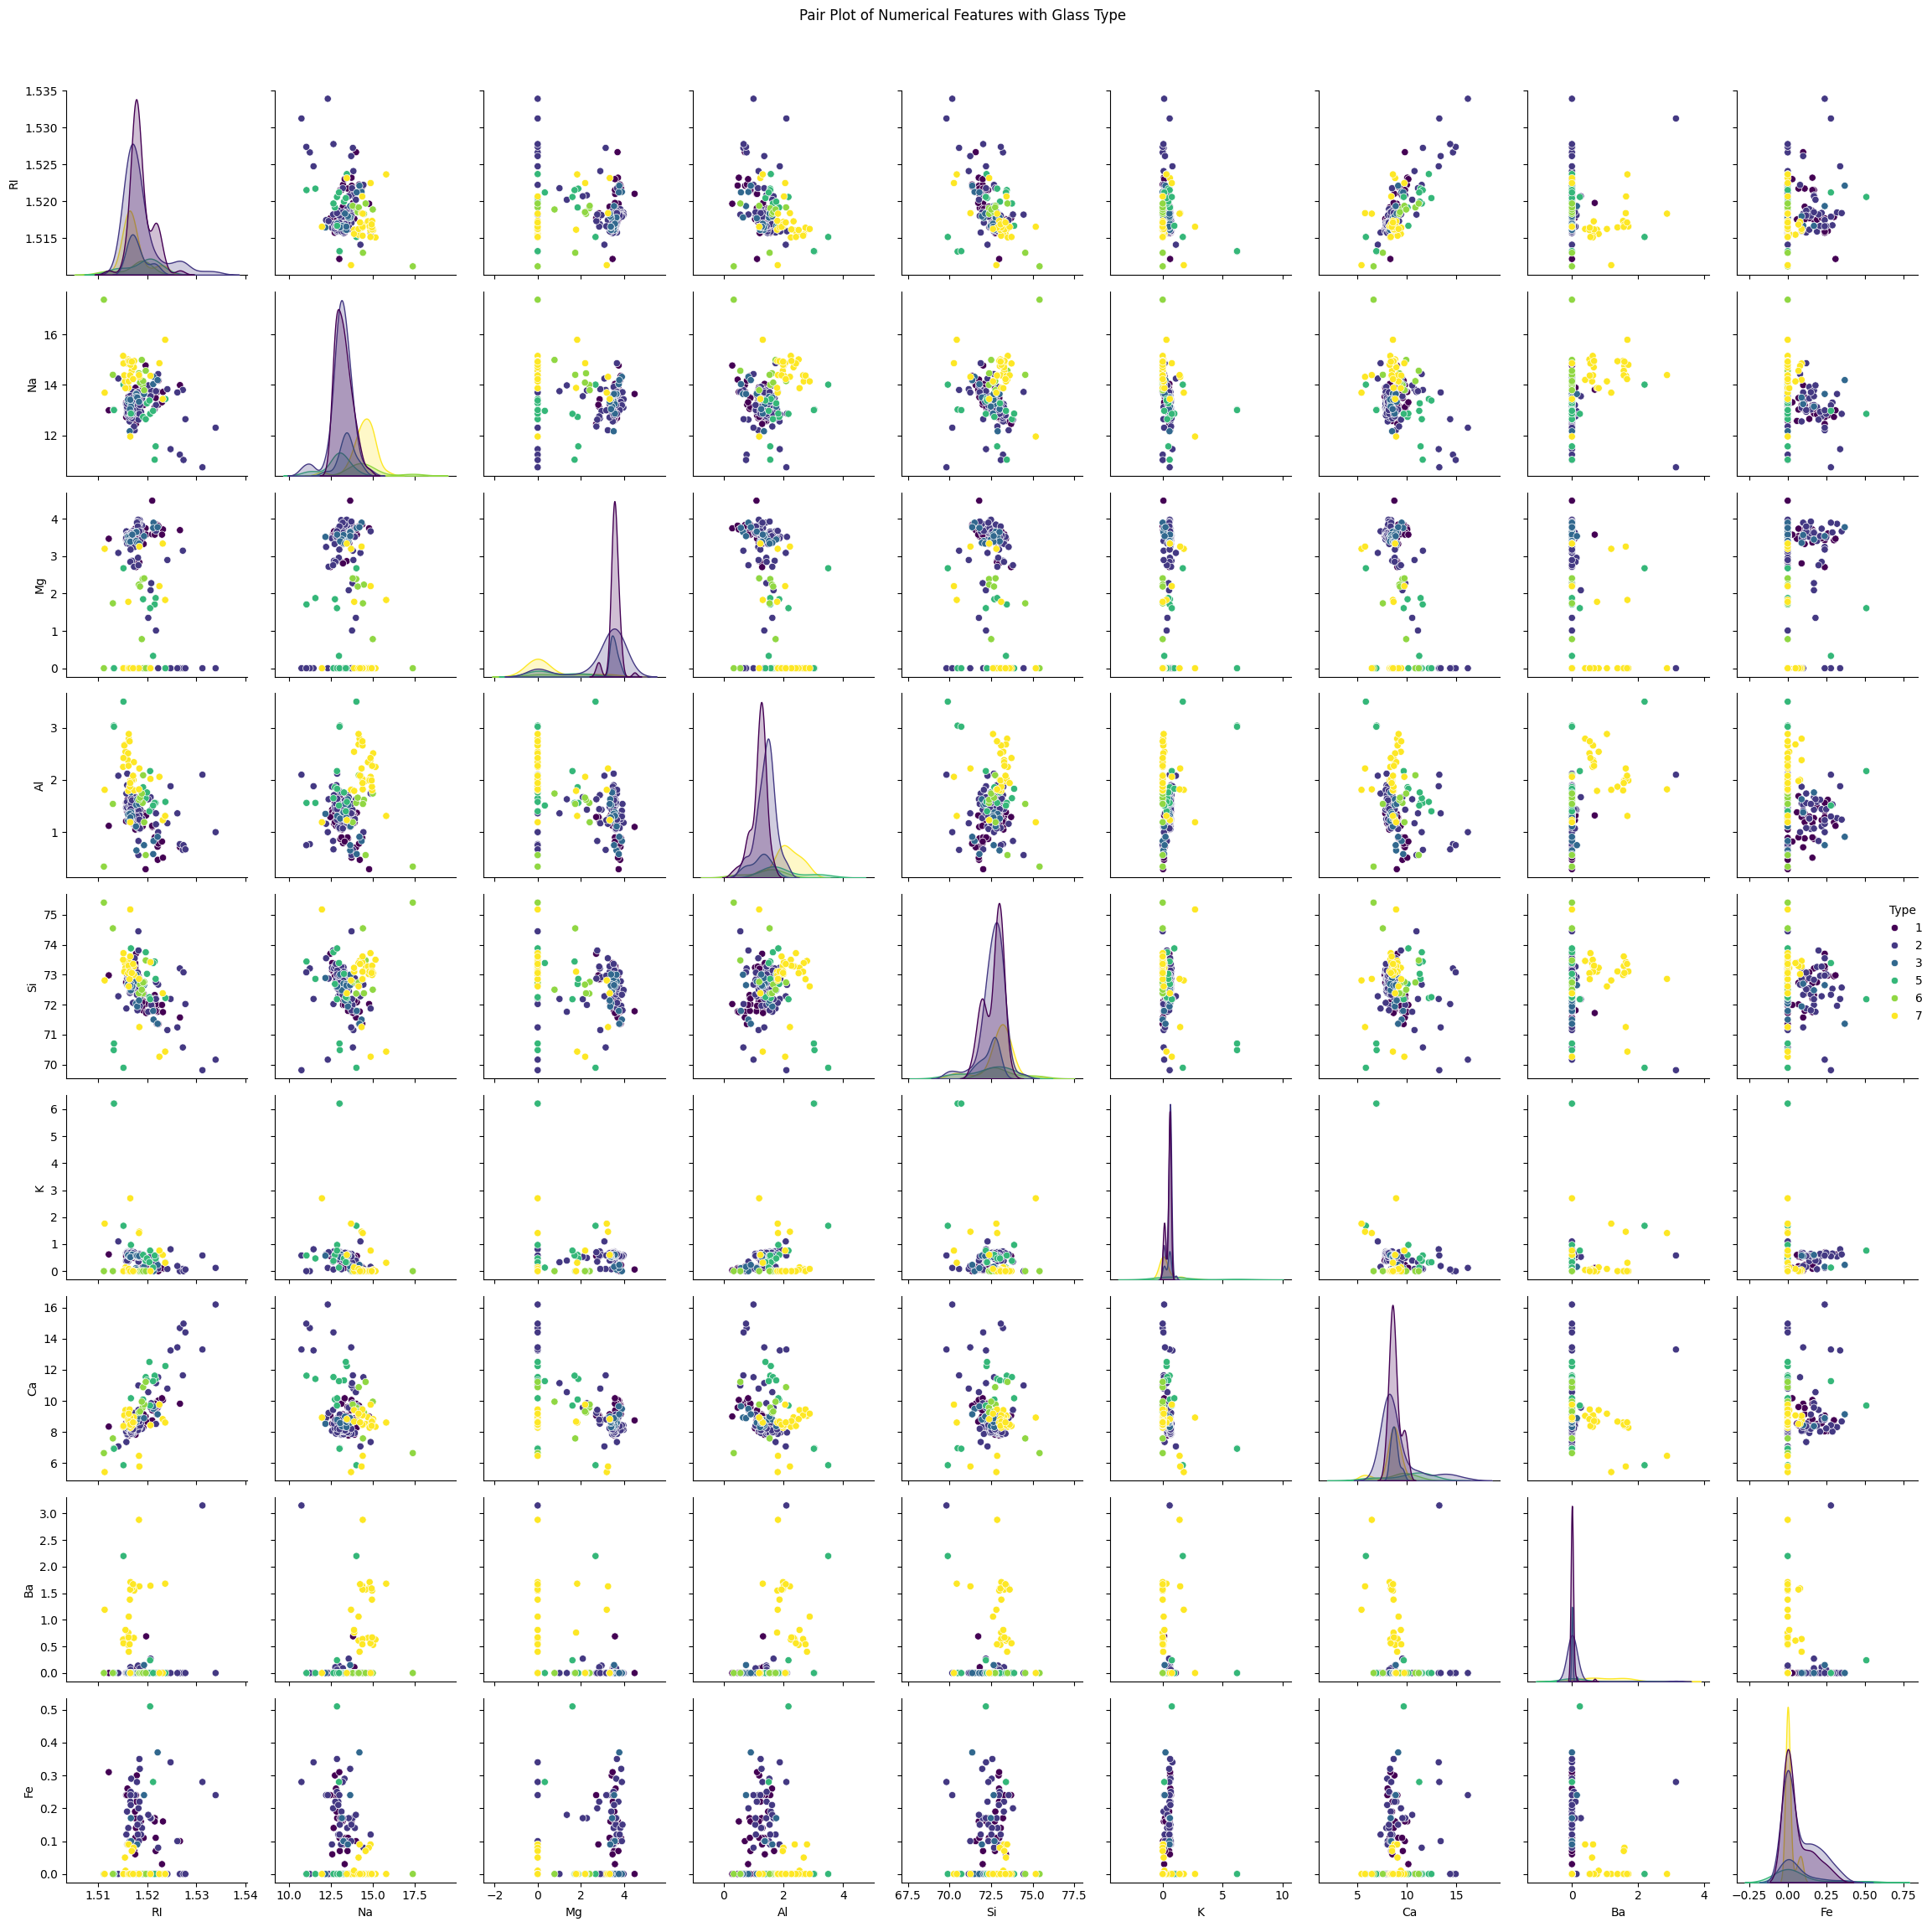

In [80]:

sns.pairplot(df, diag_kind='kde', hue='Type', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features with Glass Type', y=1.02)
plt.tight_layout()
plt.show()

In [81]:

print("Missing values:")
print(df.isnull().sum())

Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [82]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [83]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop(columns=['Type'])
y = df['Type']

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after resampling:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [84]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [85]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9456521739130435


In [86]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [87]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [89]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


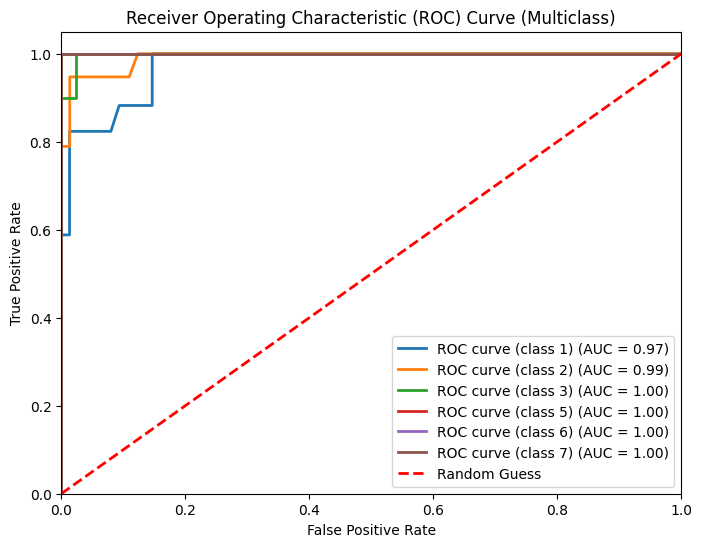

In [91]:
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for each class
y_probabilities = rf_classifier.predict_proba(X_test)

# Calculate the ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(rf_classifier.classes_)):
    # Adjusting y_test to be binary for the current class
    y_test_binary = (y_test == rf_classifier.classes_[i]).astype(int)
    fpr, tpr, _ = roc_curve(y_test_binary, y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class {0}) (AUC = {1:0.2f})'.format(rf_classifier.classes_[i], roc_auc))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.legend(loc="lower right")
plt.show()

In [93]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Initialize Bagging classifier with Random Forest base estimator
bagging_rf_classifier = BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                                          n_estimators=100, random_state=42)

# Train the Bagging classifier
bagging_rf_classifier.fit(X_train, y_train)

# Predict on the test set using Bagging with Random Forest
y_pred_bagging_rf = bagging_rf_classifier.predict(X_test)


# Initialize Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train, y_train)

# Predict on the test set using Gradient Boosting
y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)

In [94]:
# Evaluate the Bagging with Random Forest model
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print("Accuracy (Bagging with Random Forest):", accuracy_bagging_rf)

# Precision, Recall, and F1-score for Bagging with Random Forest
precision_bagging_rf = precision_score(y_test, y_pred_bagging_rf, average='weighted')
recall_bagging_rf = recall_score(y_test, y_pred_bagging_rf, average='weighted')
f1_bagging_rf = f1_score(y_test, y_pred_bagging_rf, average='weighted')

# Print evaluation metrics for Bagging with Random Forest
print("\nEvaluation Metrics for Bagging with Random Forest:")
print("Precision:", precision_bagging_rf)
print("Recall:", recall_bagging_rf)
print("F1-score:", f1_bagging_rf)

Accuracy (Bagging with Random Forest): 0.9456521739130435

Evaluation Metrics for Bagging with Random Forest:
Precision: 0.9473128019323671
Recall: 0.9456521739130435
F1-score: 0.9453762062457713


In [95]:
# Evaluate the Gradient Boosting model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print("Accuracy (Gradient Boosting):", accuracy_gradient_boosting)

# Precision, Recall, and F1-score for Gradient Boosting
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting, average='weighted')
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting, average='weighted')
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nEvaluation Metrics for Gradient Boosting:")
print("Precision:", precision_gradient_boosting)
print("Recall:", recall_gradient_boosting)
print("F1-score:", f1_gradient_boosting)

Accuracy (Gradient Boosting): 0.9239130434782609

Evaluation Metrics for Gradient Boosting:
Precision: 0.9312116778149387
Recall: 0.9239130434782609
F1-score: 0.9242856142667106


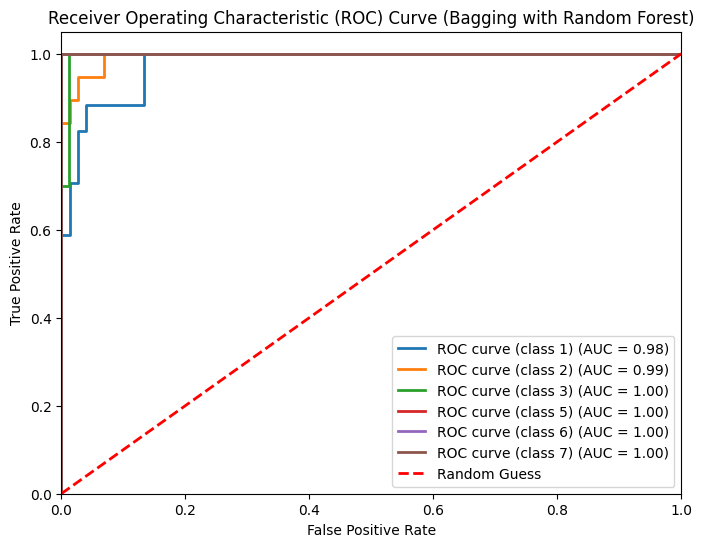

In [97]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Convert y_test to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the predicted probabilities for each class for Bagging with Random Forest
y_probabilities_bagging_rf = bagging_rf_classifier.predict_proba(X_test)

# Calculate the ROC curve and AUC for Bagging with Random Forest
fpr_bagging_rf = dict()
tpr_bagging_rf = dict()
roc_auc_bagging_rf = dict()

for i in range(len(np.unique(y_test))):
    fpr_bagging_rf[i], tpr_bagging_rf[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_bagging_rf[:, i])
    roc_auc_bagging_rf[i] = auc(fpr_bagging_rf[i], tpr_bagging_rf[i])

# Plot ROC curve for Bagging with Random Forest
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_bagging_rf[i], tpr_bagging_rf[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(np.unique(y_test)[i], roc_auc_bagging_rf[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Bagging with Random Forest)')
plt.legend(loc="lower right")
plt.show()

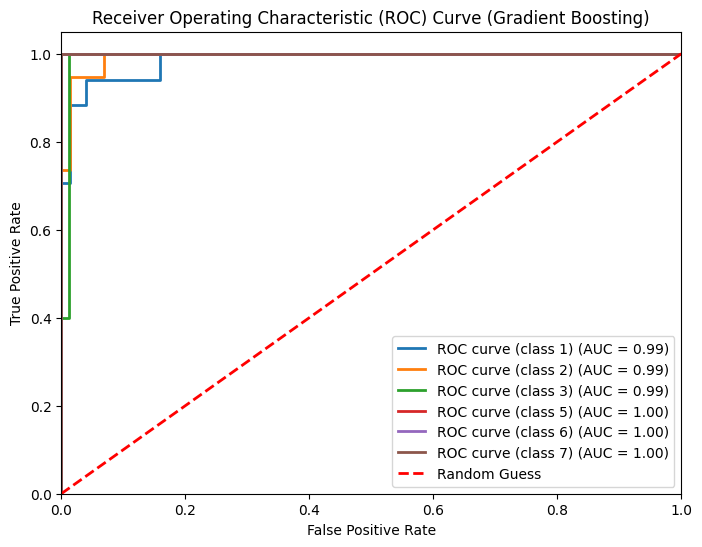

In [99]:
# Convert y_test to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the predicted probabilities for each class for Gradient Boosting
y_probabilities_gradient_boosting = gradient_boosting_classifier.predict_proba(X_test)

# Calculate the ROC curve and AUC for Gradient Boosting
fpr_gradient_boosting = dict()
tpr_gradient_boosting = dict()
roc_auc_gradient_boosting = dict()

for i in range(len(np.unique(y_test))):
    fpr_gradient_boosting[i], tpr_gradient_boosting[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities_gradient_boosting[:, i])
    roc_auc_gradient_boosting[i] = auc(fpr_gradient_boosting[i], tpr_gradient_boosting[i])

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_gradient_boosting[i], tpr_gradient_boosting[i], lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(np.unique(y_test)[i], roc_auc_gradient_boosting[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random Guess')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

 1.Can you explain Bagging and Boosting methods? How are they different from each other?

"Certainly! Both Bagging and Boosting are ensemble learning techniques used to improve the performance of machine learning models by combining multiple weak learners. However, they differ in their approach to building these ensemble models.

Bagging (Bootstrap Aggregating):
Bagging involves training multiple independent models in parallel, each on a random subset of the training data (with replacement).

These subsets are sampled with replacement from the original training data, so each model sees a slightly different perspective of the data.

The final prediction is typically obtained by averaging the predictions of all individual models (for regression) or by voting (for classification).

Examples of Bagging algorithms include Random Forest and BaggingClassifier.

Boosting:
Boosting, on the other hand, focuses on building a sequence of models, where each subsequent model learns from the mistakes of its predecessor.

It starts by training a base model on the entire training dataset and then adjusts the weights of misclassified instances to prioritize them in the next iteration.

Subsequent models are trained iteratively, with each new model paying more attention to the instances that were misclassified by the previous models.

The final prediction is typically obtained by weighted averaging of the predictions from all individual models.

Examples of Boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.










2. How do you handle imbalance in the data?


Handling imbalance in the data is crucial in machine learning tasks, especially in classification problems where one class may dominate the dataset. Here are some common techniques to address class imbalance:

Resampling Techniques: Oversampling:

Increase the number of instances in the minority class by randomly duplicating them or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

Undersampling:

Reduce the number of instances in the majority class by randomly removing samples until the class distribution is balanced.

Algorithmic Techniques: Class Weighting:

Assign higher weights to instances of the minority class during model training to penalize misclassifications more heavily.

Ensemble Methods:

Use ensemble algorithms like Bagging and Boosting with techniques specifically designed to handle class imbalance (e.g., BalancedBaggingClassifier, BalancedRandomForestClassifier).

Cost-sensitive Learning:

Adjust the cost function to reflect the imbalance in class distribution, penalizing misclassifications of the minority class more severely.

Data-level Techniques:

Collect More Data: If possible, collect more data for the minority class to balance the dataset naturally.

Feature Engineering:

Create informative features that help the model distinguish between classes more effectively, reducing the impact of class imbalance.

Choosing the appropriate technique depends on factors such as the severity of class imbalance, dataset size, computational resources, and the specific characteristics of the problem domain.

It's often beneficial to experiment with different approaches to find the most effective solution for a particular dataset.

Colab paid products - Cancel contracts here
